<a href="https://colab.research.google.com/github/patilgauri005/Lab-works-/blob/main/lab_8_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================
# LAB 8: Constraint-Based Optimization (Advanced)
# Problem: Resource Allocation for Maximum Profit
# ============================================


✅ Optimization Successful!
Optimal Production of Product A: 14.00 units
Optimal Production of Product B: 24.00 units
Maximum Profit: ₹900.00


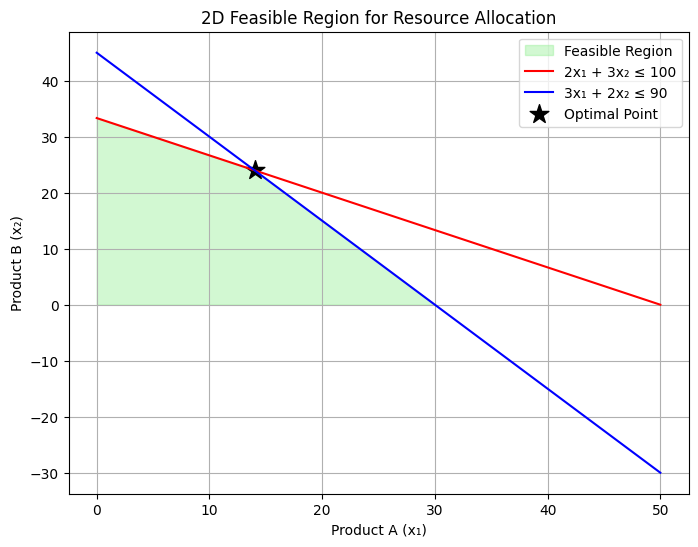

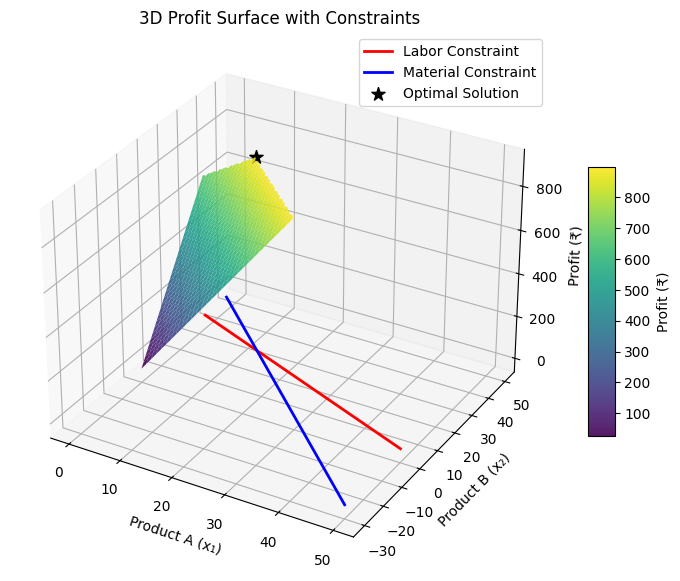

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from mpl_toolkits.mplot3d import Axes3D

# -------------------------
# Step 1: Define coefficients
# -------------------------
# Objective: Maximize Z = 30x1 + 20x2 (linprog minimizes, so use negative)
c = [-30, -20]

# -------------------------
# Step 2: Define constraints
# -------------------------
# 2x1 + 3x2 ≤ 100 (Labor)
# 3x1 + 2x2 ≤ 90  (Material)
A = [
    [2, 3],
    [3, 2]
]
b = [100, 90]

# -------------------------
# Step 3: Define variable bounds
# -------------------------
x_bounds = (0, None)
bounds = [x_bounds, x_bounds]

# -------------------------
# Step 4: Solve optimization problem
# -------------------------
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

if result.success:
    x1, x2 = result.x
    print("✅ Optimization Successful!")
    print(f"Optimal Production of Product A: {x1:.2f} units")
    print(f"Optimal Production of Product B: {x2:.2f} units")
    print(f"Maximum Profit: ₹{(-result.fun):.2f}")
else:
    print("❌ Optimization Failed:", result.message)

# -------------------------
# Step 5: 2D Feasible Region Visualization
# -------------------------
x = np.linspace(0, 50, 200)
y1 = (100 - 2*x) / 3   # Labor constraint
y2 = (90 - 3*x) / 2    # Material constraint

plt.figure(figsize=(8,6))
y3 = np.minimum(y1, y2)
y3[y3 < 0] = np.nan

plt.fill_between(x, y3, color='lightgreen', alpha=0.4, label="Feasible Region")
plt.plot(x, y1, color='red', label=r'2x₁ + 3x₂ ≤ 100')
plt.plot(x, y2, color='blue', label=r'3x₁ + 2x₂ ≤ 90')
plt.scatter(x1, x2, color='black', s=200, marker='*', label='Optimal Point')
plt.xlabel("Product A (x₁)")
plt.ylabel("Product B (x₂)")
plt.title("2D Feasible Region for Resource Allocation")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# Step 6: 3D Profit Surface Visualization
# -------------------------
# Create meshgrid for visualization
X, Y = np.meshgrid(np.linspace(0, 50, 100), np.linspace(0, 50, 100))
Z = 30*X + 20*Y  # Profit function

# Apply constraints (make infeasible points NaN)
Z[(2*X + 3*Y > 100) | (3*X + 2*Y > 90)] = np.nan

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Profit (₹)")

# Mark feasible region boundary
ax.plot(x, y1, 0, color='red', linewidth=2, label=r'Labor Constraint')
ax.plot(x, y2, 0, color='blue', linewidth=2, label=r'Material Constraint')

# Mark optimal point in 3D
ax.scatter(x1, x2, 30*x1 + 20*x2, color='black', s=100, marker='*', label='Optimal Solution')

# Labels
ax.set_xlabel("Product A (x₁)")
ax.set_ylabel("Product B (x₂)")
ax.set_zlabel("Profit (₹)")
ax.set_title("3D Profit Surface with Constraints")
ax.legend()
plt.show()